<a href="https://colab.research.google.com/github/Usermer/TPs-Technologies-Intelligence-1rtificielle/blob/main/TP_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#!pip install opencv-python
#!pip install git+https://github.com/facebookresearch/detectron2.git
#!pip install dlib face_recognition

# **Partie 1 : Concepts de base de la vision par ordinateur**

***Exercice 1 : Analyse d’une image***

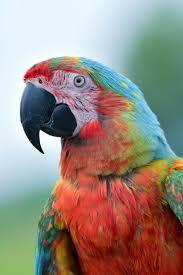

In [1]:
import cv2
from google.colab.patches import cv2_imshow

#lire une image
img = cv2.imread('/content/imageperroquet.jpeg')
cv2_imshow(img)

# cv2.waitKey(0) # Not needed with cv2_imshow in Colab
# cv2.destroyAllWindows() # Not needed with cv2_imshow in Colab

***Conversion en niveaux de gris :***


Dans OpenCV, on peut effectuer cette conversion en utilisant la fonction `cv2.cvtColor()`. L'argument `cv2.COLOR_BGR2GRAY` spécifie qu'on souhaite convertir une image du format BGR (Bleu, Vert, Rouge - l'ordre par défaut des canaux dans OpenCV pour les images couleur) en niveaux de gris. Par exemple, la ligne de code `gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` prend l'image couleur stockée dans la variable `img` et crée une nouvelle image en niveaux de gris stockée dans la variable `gray`. Cela réduit la quantité de données nécessaires pour représenter l'image et est souvent une étape préliminaire dans de nombreux algorithmes de traitement d'images.

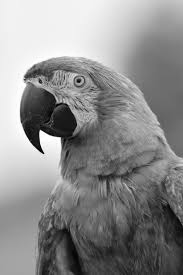

In [2]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

***Détection des contours :***

La détection de contours est une technique fondamentale en vision par ordinateur qui vise à identifier les frontières des objets dans une image. Ces contours sont généralement les lignes qui marquent les changements significatifs dans l'intensité des pixels. La détection de contours est utile pour de nombreuses applications, telles que la reconnaissance d'objets, la segmentation d'images et l'analyse de formes.

**Algorithme de Canny :**

L'algorithme de Canny est l'une des méthodes les plus populaires et efficaces pour la détection de contours.

**les parametres de la fonction cv.Canny**


*   `img`:c'est l'image d'entrée
*   `100`:premier seuil: C'est le seuil bas pour l'algorithme de seuillage par hystérésis. Les pixels avec une intensité de gradient inférieure à ce seuil sont immédiatement rejetés comme n'étant pas des contours.
* `200` (deuxième seuil) : C'est le seuil haut pour l'algorithme de seuillage par hystérésis. Les pixels avec une intensité de gradient supérieure à ce seuil sont considérés comme des contours forts et sont inclus dans le résultat final. Les pixels avec une intensité de gradient entre les deux seuils sont inclus s'ils sont connectés à des pixels ayant une intensité de gradient supérieure au seuil haut.

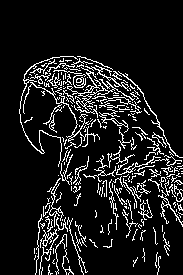

(275, 183)


In [3]:
#detection des contours avec l'algorithme de Canny
edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)

print(edges.shape)


***Questions***
1. Que représente la matrice retournée par OpenCV pour l’image ?
2. Pourquoi convertit-on souvent l’image en niveaux de gris avant traitement ?

***Réponses aux questions :***

1.  **Que représente la matrice retournée par OpenCV pour l’image ?**

In [4]:
import cv2

print("***  Pour l'image couleur (img):***")
print("Dimensions (hauteur, largeur, canaux de couleur):", img.shape)
print("Type de données des pixels:", img.dtype)
print(img[0][:3])

print("-" * 30)

print("***Pour l'image en niveaux de gris (gray):***")
print("Dimensions (hauteur, largeur):", gray.shape)
print("Type de données des pixels:", gray.dtype)
print(gray[0][:3])


***  Pour l'image couleur (img):***
Dimensions (hauteur, largeur, canaux de couleur): (275, 183, 3)
Type de données des pixels: uint8
[[253 243 226]
 [254 244 227]
 [254 244 227]]
------------------------------
***Pour l'image en niveaux de gris (gray):***
Dimensions (hauteur, largeur): (275, 183)
Type de données des pixels: uint8
[239 240 240]


On constate que dans OpenCV, une image est  représentée comme une matrice NumPy. Les dimensions de cette matrice dépendent du type d'image :

   
*  Pour une image en **niveaux de gris**, la matrice a deux dimensions (hauteur x largeur). Chaque élément de la matrice représente l'intensité (luminosité) du pixel correspondant, généralement une valeur entre 0 (noir) et 255 (blanc) pour les images 8 bits.

*   Pour une image en **couleur** (comme BGR, l'ordre par défaut dans OpenCV), la matrice a trois dimensions (hauteur x largeur x canaux de couleur). La troisième dimension représente les canaux de couleur. Pour une image BGR 8 bits, il y aura une valeur pour le bleu, une pour le vert et une pour le rouge pour chaque pixel, chacune allant de 0 à 255.



2.  **Pourquoi convertit-on souvent l’image en niveaux de gris avant traitement ?**
    La conversion d'une image en niveaux de gris avant le traitement est une étape courante pour plusieurs raisons :
    *   **Réduction de la complexité :** Une image en niveaux de gris est plus simple qu'une image couleur car elle n'a qu'un seul canal d'information par pixel au lieu de trois. Cela réduit la quantité de données à traiter, ce qui peut accélérer les algorithmes de traitement d'images.
    *   **Focus sur l'information structurelle :**
   La conversion en niveaux de gris permet de se concentrer sur la structure et la luminosité de l'image, ce qui est souvent suffisant et parfois plus efficace pour ces tâches.
    *   **Standardisation :** De nombreux algorithmes ont été développés et optimisés pour fonctionner sur des images en niveaux de gris. Convertir l'image permet d'utiliser ces algorithmes directement.
    *   **Moins sensible aux variations d'éclairage :** Dans certains cas, les algorithmes appliqués aux images en niveaux de gris peuvent être moins sensibles aux variations de couleur dues aux conditions d'éclairage.



---


# Partie 2 : Traitement d’images et vidéos avec OpenCV

**Exercice 2 : Lecture vidéo / webcam**

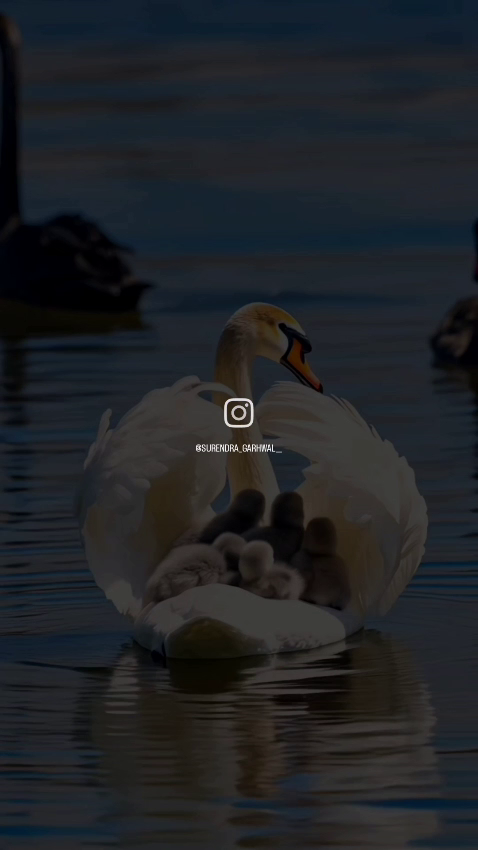

Fin de la vidéo ou erreur de lecture de la trame.
Flux vidéo fermé.


In [10]:
import cv2
from google.colab.patches import cv2_imshow
import time
from IPython import display

# 🔹 Chemin vers ta vidéo
video_path = "/content/video.18.26_067f92a3.mp4"

# 🔹 Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Erreur : impossible d’ouvrir la vidéo.")
else:
    print(f"Lecture de la vidéo depuis {video_path}. Pour arrêter, veuillez interrompre l'exécution de la cellule (par exemple, en cliquant sur le bouton d'arrêt à côté de la cellule).")
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Fin de la vidéo ou erreur de lecture de la trame.")
                break

            # Effacer la sortie précédente pour une animation fluide

            display.clear_output(wait=True);

            # Afficher la trame originale

            cv2_imshow(frame)

            # Ajouter un petit délai pour contrôler le framerate (environ 30 FPS)

            time.sleep(0.03)

    except KeyboardInterrupt:
        print("Affichage vidéo interrompu par l'utilisateur.")
    finally:
        # Libérer les ressources
        cap.release()
        print("Flux vidéo fermé.")

# Partie 3 : Détection et segmentation d’objets avec Detectron2

***Exercice 3 : Détection d’objets***

`Detectron2` est une bibliothèque logicielle open-source de Facebook AI Research (FAIR) pour la détection d'objets, la segmentation d'instances et la détection de points clés. Elle est construite sur PyTorch et offre une plateforme flexible et extensible pour implémenter de nouveaux algorithmes de vision par ordinateur. En bref, elle permet d'identifier et de localiser des objets spécifiques

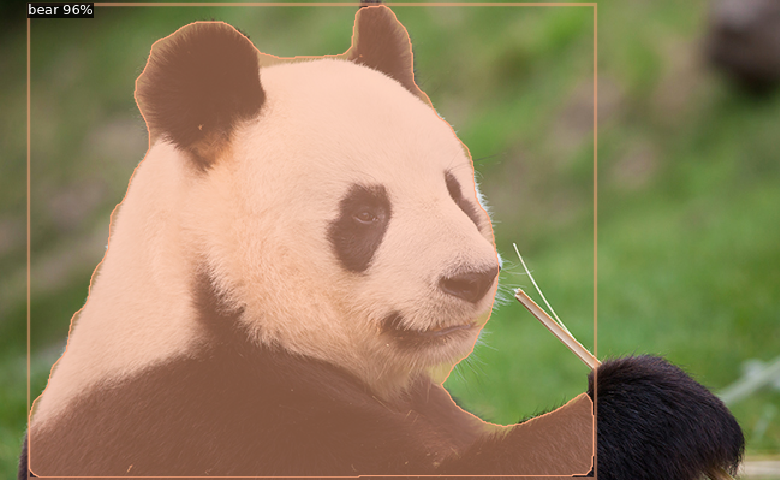

In [10]:
# Configuration du modèle pré-entraîné
# Obtenir une configuration par défaut de Detectron2
cfg = get_cfg()


# Fusionner la configuration avec un fichier de configuration de modèle pré-entraîné.
# Ici, on utilise Mask R-CNN avec un backbone R-50-FPN entraîné sur COCO pour la segmentation d'instances.
cfg.merge_from_file(model_zoo.get_config_file(
     "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml" ))


# Définir le seuil de score pour la détection. Seules les détections avec un score supérieur à 0.5 seront affichées.
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5


# Charger les poids pré-entraînés du modèle depuis l'URL de model_zoo.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url( "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml" )


# Créer un prédicteur par défaut en utilisant la configuration définie.
predictor = DefaultPredictor(cfg)

# Charger une image
img = cv2.imread('/content/téléchargé (1).jpeg')

# Effectuer la prédiction sur l'image chargée
outputs = predictor(img)

# Visualisation des résultats
# Initialiser le Visualizer avec l'image originale (conversion BGR vers RGB pour matplotlib/Detectron2).
v = Visualizer(img[:, :, ::-1],
# Obtenir les métadonnées du jeu de données d'entraînement (COCO dans ce cas) pour les noms de classes.
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# Dessiner les prédictions d'instances sur l'image.
# Les prédictions sont d'abord transférées vers le CPU pour la visualisation.
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Importer cv2_imshow spécifique à Google Colab pour afficher l'image.
from google.colab.patches import cv2_imshow
# Afficher l'image résultante avec les détections (conversion BGR vers RGB pour l'affichage).
cv2_imshow(out.get_image()[:, :, ::-1])

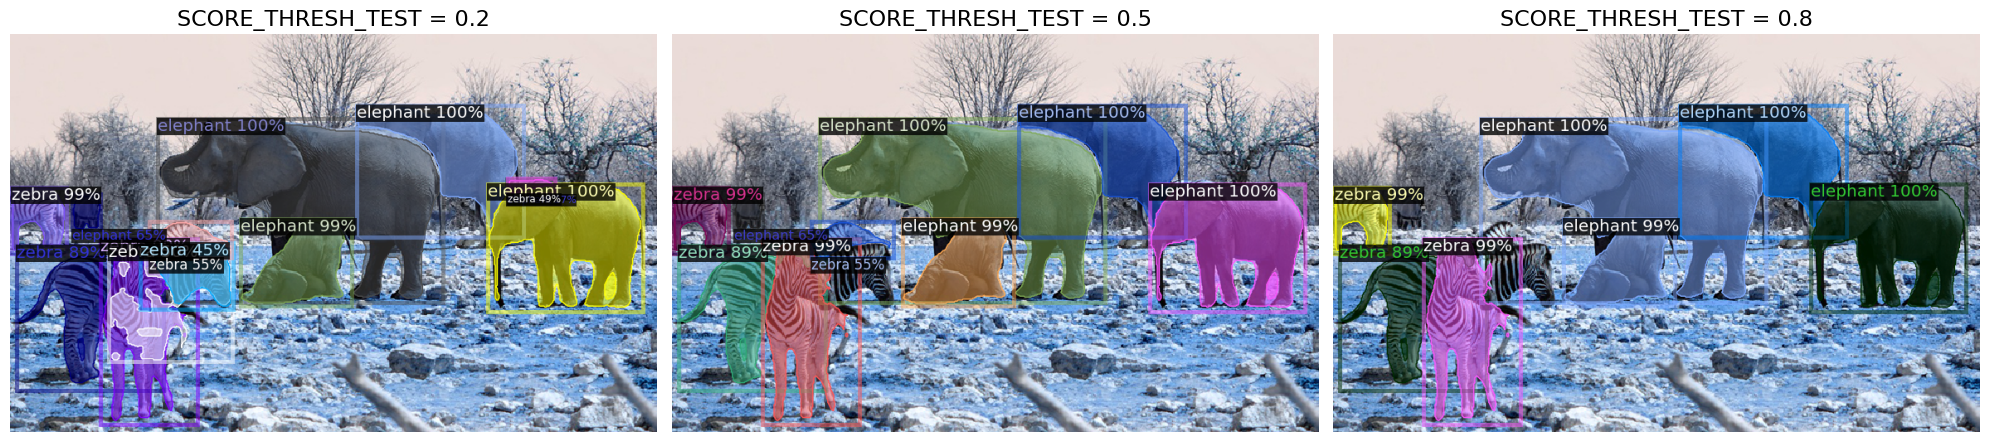

In [12]:
# ========================
# IMPORTS ET CONFIGURATION
# ========================
import cv2
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# ========================
#  Charger l'image
# ========================
img = cv2.imread('/content/animaux.png')

# ========================
#  Définir trois seuils à comparer
# ========================
thresholds = [0.2, 0.5, 0.8]
results = []

for thresh in thresholds:
    # Configuration du modèle pré-entraîné
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(
        "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
    ))

    # Modifier le seuil de détection
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = thresh
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
        "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
    )

    # Créer un prédicteur
    predictor = DefaultPredictor(cfg)

    # Effectuer la prédiction
    outputs = predictor(img)


    v = Visualizer(
        img[:, :, ::-1],
        MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
        scale=1.2,
        instance_mode=ColorMode.IMAGE
    )


    v._default_font_size = 12

    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    results.append(out.get_image()[:, :, ::-1])

#affichage
plt.figure(figsize=(20, 7))
for i, thresh in enumerate(thresholds):
    plt.subplot(1, 3, i + 1)
    plt.imshow(results[i])
    plt.title(f"SCORE_THRESH_TEST = {thresh}", fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()





**Observation**

On constate que **plus** le seuil de détection (`SCORE_THRESH_TEST`) augmente, **moins** il y a de détections visibles sur l’image. En effet, lorsque le seuil est faible (par exemple 0.2), le modèle affiche un grand nombre d’objets avec leurs noms et probabilités, même si certaines détections sont incorrectes. En revanche, à mesure que le seuil augmente (0.5 puis 0.8), seules les prédictions les plus sûres sont conservées : le nombre de boîtes et de labels diminue, et dans certains cas, les noms et probabilités n’apparaissent plus du tout, car aucun objet ne dépasse ce niveau de confiance. Cela montre que le seuil agit comme un filtre de confiance : plus **il est élevé, plus le modèle devient strict dans ses détections.**

# Partie 4 : Détection et reconnaissance faciale avec Dlib

 ***Exercice 4 : Détection faciale***

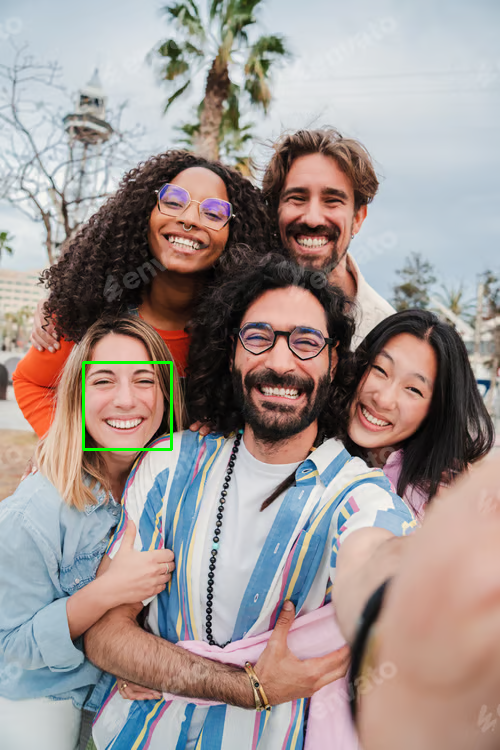

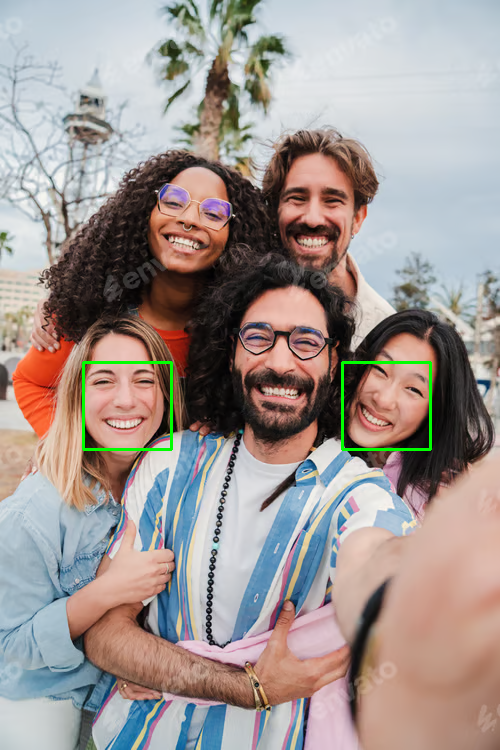

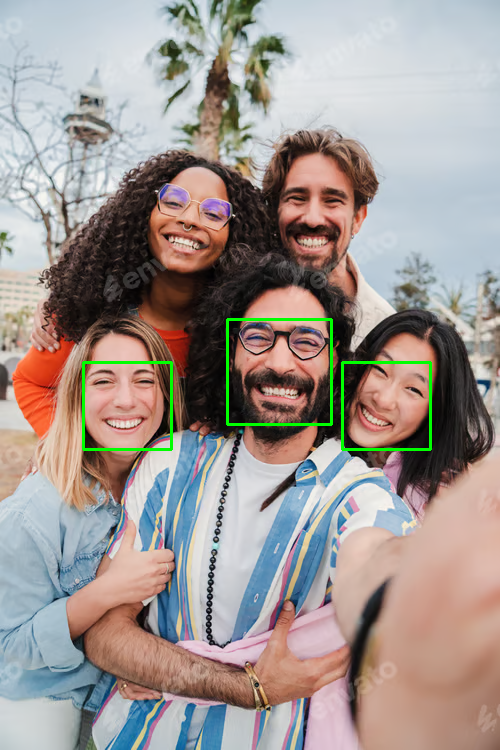

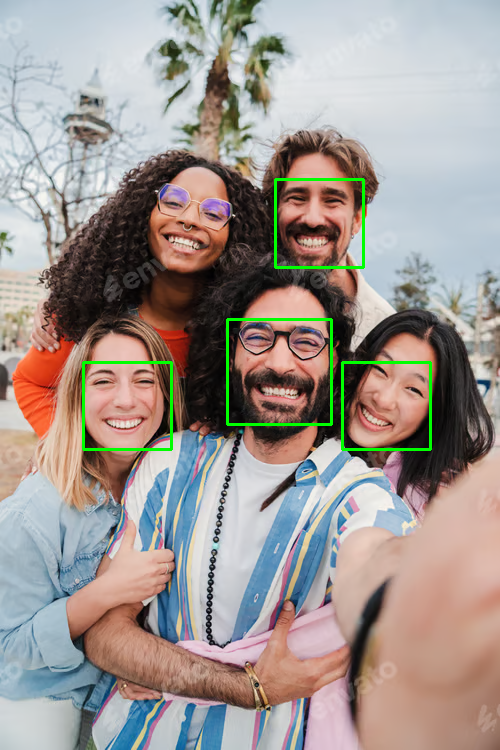

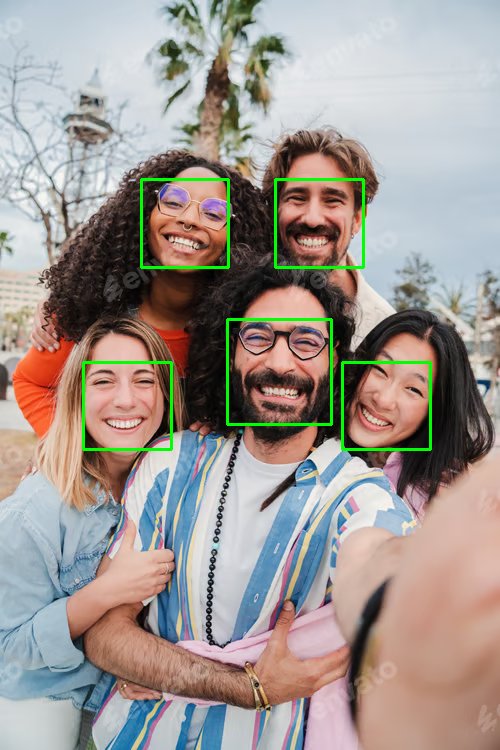

In [22]:
import dlib
import cv2
detector = dlib.get_frontal_face_detector()
img = cv2.imread("/persos.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
#Boucle à travers chaque visage détecté dans la liste faces.
for face in faces:
  # Pour chaque visage détecté (face), cette ligne extrait les coordonnées du coin supérieur
  # gauche (x, y) ainsi que la largeur (w) et la hauteur (h) du rectangle englobant le visage.
  x, y, w, h = face.left(), face.top(), face.width(), face.height()
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  # cv2.imshow("Visages détectés", img)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)

Ce programme utilise la bibliothèque `dlib` pour détecter automatiquement les visages dans une image. Il commence par charger l’image avec OpenCV, puis la convertit en niveau de gris afin de faciliter et d’accélérer la détection. Le modèle pré-entraîné de `dlib.get_frontal_face_detector()` identifie ensuite les zones où un visage est présent. Pour chaque visage détecté, un rectangle vert est tracé autour de la région correspondante à l’aide de `cv2.rectangle()`.

**Exercice 5 : Reconnaissance faciale**

In [17]:
#!apt-get install -y cmake libopenblas-dev liblapack-dev
#!pip install dlib face_recognition
#!pip uninstall -y dlib
#!pip install dlib-bin


L'objectif de cet exercice est d'effectuer une comparaison faciale entre deux images pour déterminer si elles représentent la même personne.

***Image 1***

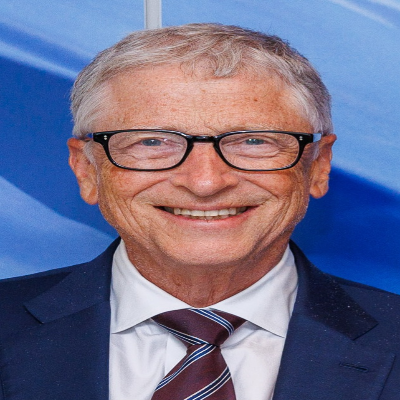

In [14]:
import cv2
from google.colab.patches import cv2_imshow

#lire les deux image
img1 = cv2.imread('/gates1.png')

img1_small = cv2.resize(img1, (400, 400))
cv2_imshow(img1_small)


***Image 2***

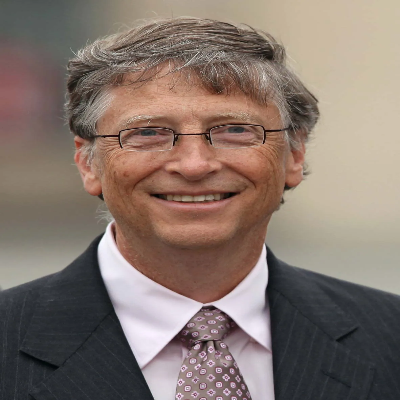

In [16]:
img2 = cv2.imread('/gates2.png')

img2_small = cv2.resize(img2, (400, 400))
cv2_imshow(img2_small)


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import face_recognition

image_ref = face_recognition.load_image_file("/gates1.png")
encodage_ref = face_recognition.face_encodings(image_ref)[0]

image_test = face_recognition.load_image_file("/gates2.png")
encodage_test = face_recognition.face_encodings(image_test)[0]

result = face_recognition.compare_faces([encodage_ref], encodage_test)
distance = face_recognition.face_distance([encodage_ref], encodage_test)

print("Même personne ?", result[0])
print(f"Distance faciale : {distance[0]:.4f}")

Même personne ? True
Distance faciale : 0.3934


Après analyse comparative des deux images par reconnaissance faciale, le système a déterminé que ces deux visages appartiennent à la même personne. La distance faciale calculée de 0.39 confirme une forte similarité entre les caractéristiques faciales détectées.